En este notebook vamos a verificar la correlación de los datos para visualizar la relación entre las variables.

## Librerías

In [43]:
import pandas as pd
import numpy as np
import os
from pathlib import PurePath
import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos

In [17]:
root = r"C:\Users\Isai\Documents\Tesis\code\data_analysis\all_vars\zafra2022"

In [21]:
dfs = [pd.read_csv(PurePath(root, f), parse_dates=True) for f in os.listdir(root) if f.endswith(".csv")]

In [27]:
to_concat = []
for i in dfs:    
    i['Fecha'] = pd.to_datetime(i['Fecha'])
    i['kc'] = 1.15 * i['ndvi'] + 0.17
    i['etc'] = i['kc'] * i['et']
    i['etc_acum'] = i['etc'].cumsum()
    to_concat.append(i)
    
df = pd.concat(to_concat, ignore_index=True, axis=0)

In [54]:
df.corr()

,Parcela,Fecha,dias,ndvi,ndmi,msi,temp,dia_x,reconstruida_temp,ajustados_temp,...,dia,reconstruida_et,ajustados_et,et_acum,et_acum_ajustados,rh12,holtwinters_predicts,kc,etc,etc_acum
Parcela,1.000000,-0.023354,-0.028328,-0.034477,-0.021173,0.001442,-0.004872,-0.023354,-0.005617,0.000944,...,-0.023354,-0.011834,-0.009834,-0.037054,-0.027841,0.001302,0.001816,-0.034477,-0.036545,-0.054048
Fecha,-0.023354,1.000000,0.935617,0.609529,0.652201,-0.670675,-0.498722,1.000000,-0.531477,-0.615959,...,1.000000,-0.621891,-0.640655,0.910047,0.925084,0.188292,0.224402,0.609529,-0.111806,0.906582
dias,-0.028328,0.935617,1.000000,0.634672,0.688178,-0.704043,-0.521410,0.935617,-0.556065,-0.640733,...,0.935617,-0.637830,-0.668710,0.983640,0.986281,0.173372,0.206686,0.634672,-0.088510,0.987180
ndvi,-0.034477,0.609529,0.634672,1.000000,0.968856,-0.971799,-0.306733,0.609529,-0.325799,-0.296078,...,0.609529,-0.564273,-0.525546,0.700224,0.698473,0.408659,0.462479,1.000000,0.288821,0.687673
ndmi,-0.021173,0.652201,0.688178,0.968856,1.000000,-0.991674,-0.338628,0.652201,-0.359776,-0.353952,...,0.652201,-0.566109,-0.544060,0.729202,0.728252,0.360504,0.409947,0.968856,0.249085,0.744233
msi,0.001442,-0.670675,-0.704043,-0.971799,-0.991674,1.000000,0.336055,-0.670675,0.357046,0.344949,...,-0.670675,0.570351,0.539966,-0.751502,-0.750319,-0.378118,-0.430941,-0.971799,-0.254525,-0.755690
temp,-0.004872,-0.498722,-0.521410,-0.306733,-0.338628,0.336055,1.000000,-0.498722,0.934970,0.784852,...,-0.498722,0.811129,0.770874,-0.480193,-0.496488,-0.140746,-0.128846,-0.306733,0.657921,-0.512696
dia_x,-0.023354,1.000000,0.935617,0.609529,0.652201,-0.670675,-0.498722,1.000000,-0.531477,-0.615959,...,1.000000,-0.621891,-0.640655,0.910047,0.925084,0.188292,0.224402,0.609529,-0.111806,0.906582
reconstruida_temp,-0.005617,-0.531477,-0.556065,-0.325799,-0.359776,0.357046,0.934970,-0.531477,1.000000,0.839606,...,-0.531477,0.866757,0.824335,-0.512005,-0.529338,-0.145900,-0.155260,-0.325799,0.610695,-0.546874
ajustados_temp,0.000944,-0.615959,-0.640733,-0.296078,-0.353952,0.344949,0.784852,-0.615959,0.839606,1.000000,...,-0.615959,0.793522,0.932798,-0.571979,-0.591158,-0.014213,-0.019378,-0.296078,0.578623,-0.618093


## Correlación

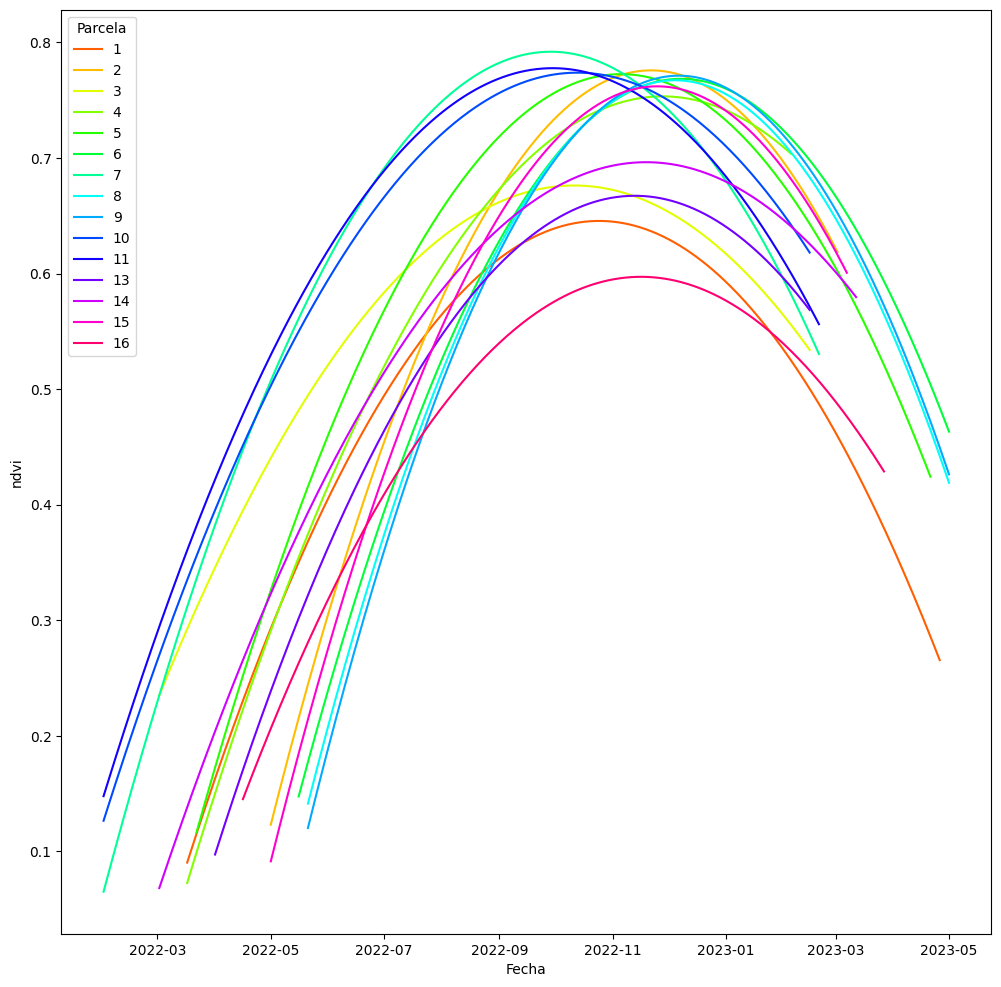

In [68]:
ids = df['Parcela'].unique()
palette = sns.color_palette("hsv", len(ids))

plt.figure(figsize=(12, 12))
sns.lineplot(data=df, x='Fecha', y='ndvi', hue='Parcela', palette=palette)
plt.legend(title='Parcela')
plt.show()